# Multiclass Classification with Keras


<br>

In this notebook, we'll implement a fully connected feedforward neural network for a multiclass classification problem using the Iris dataset. As is customary, to solve this problem, we'll use the Sklearn and Keras libraries.

<br>
<hr>

In [1]:
#Loading libraries and methods:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from tqdm.notebook import tqdm

In [2]:
#Loading the dataset:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Dataset dimensions:
data.shape

(150, 6)

In [4]:
#The pred variable stores the predictors (petal.length, ...).
#The cla variable stores the classes.

#Converting to the numpy format:
pred = data.iloc[:, 0:4].values

#Converting to the numpy format:
cla = data.iloc[:, 4].values 

#Transforming to numeric features:
#labelencoder = LabelEncoder()
#cla = labelencoder.fit_transform(cla)

cla_dummy = np_utils.to_categorical(cla, 3)

#Iris setosa      1 0 0
#Iris virginica   0 1 0
#Iris versicolor  0 0 1

In [5]:
#Splitting the dataset into training and test datasets:

pred_train, pred_test, cla_train, cla_test = train_test_split(pred, cla_dummy, test_size = 0.25)

In [6]:
#Training dataset: 75% / Test dataset: 25%

print(pred_train.shape)
print(pred_test.shape)
print(cla_train.shape)
print(cla_test.shape)

(112, 4)
(38, 4)
(112, 3)
(38, 3)


In [13]:
#Building the neural network with 2 hidden layers:

classifier = Sequential()
classifier.add(Dense(units=4, activation='relu', input_dim = 4))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=4, activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units=3, activation='softmax'))

#Compiling the neural network:
classifier.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'])

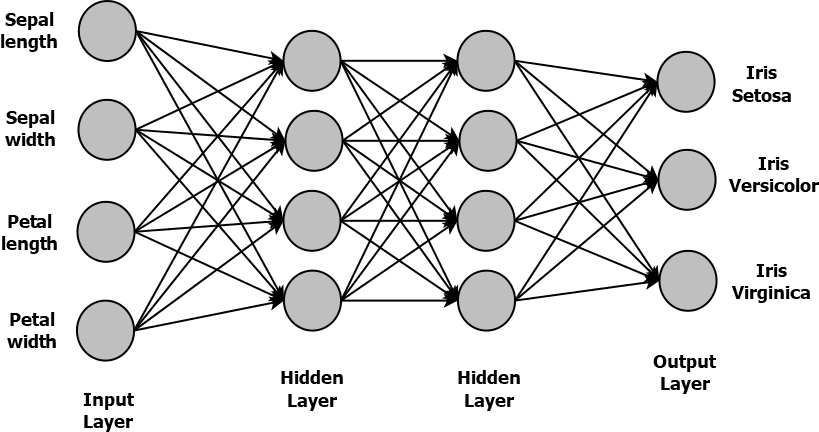

In [8]:
#Neural network architecture:

from IPython.display import Image
Image(filename='/kaggle/input/images/meuralnet.png') 

In [14]:
#Training the neural network:

tqdm(classifier.fit(pred_train, cla_train, batch_size = 10, epochs = 1000))

Epoch 1/1000
12/12 [==============================] - 0s 1ms/step - loss: 1.1013 - categorical_accuracy: 0.6250
Epoch 2/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9837 - categorical_accuracy: 0.6071
Epoch 3/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9572 - categorical_accuracy: 0.6696
Epoch 4/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9619 - categorical_accuracy: 0.6429
Epoch 5/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.8943 - categorical_accuracy: 0.6429
Epoch 6/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.9128 - categorical_accuracy: 0.5625
Epoch 7/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.8731 - categorical_accuracy: 0.5982
Epoch 8/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.8024 - categorical_accuracy: 0.7054
Epoch 9/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.8777 - categorical_accuracy:

12/12 [==============================] - 0s 1ms/step - loss: 0.5045 - categorical_accuracy: 0.7857
Epoch 74/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5405 - categorical_accuracy: 0.7500
Epoch 75/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5726 - categorical_accuracy: 0.7411
Epoch 76/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5167 - categorical_accuracy: 0.7679
Epoch 77/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.6138 - categorical_accuracy: 0.6964
Epoch 78/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5119 - categorical_accuracy: 0.7589
Epoch 79/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5311 - categorical_accuracy: 0.7411
Epoch 80/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5391 - categorical_accuracy: 0.7857
Epoch 81/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4892 - categorical_accuracy: 0.77

12/12 [==============================] - 0s 1ms/step - loss: 0.4837 - categorical_accuracy: 0.8125
Epoch 146/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4510 - categorical_accuracy: 0.7857
Epoch 147/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4611 - categorical_accuracy: 0.7857
Epoch 148/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5930 - categorical_accuracy: 0.7054
Epoch 149/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4829 - categorical_accuracy: 0.7946
Epoch 150/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4670 - categorical_accuracy: 0.7857
Epoch 151/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5135 - categorical_accuracy: 0.7857
Epoch 152/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5154 - categorical_accuracy: 0.7679
Epoch 153/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4699 - categorical_accura

Epoch 217/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4359 - categorical_accuracy: 0.7768
Epoch 218/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5294 - categorical_accuracy: 0.7232
Epoch 219/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4025 - categorical_accuracy: 0.7768
Epoch 220/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4942 - categorical_accuracy: 0.7500
Epoch 221/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4376 - categorical_accuracy: 0.7946
Epoch 222/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4659 - categorical_accuracy: 0.7589
Epoch 223/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4188 - categorical_accuracy: 0.8125
Epoch 224/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4123 - categorical_accuracy: 0.8125
Epoch 225/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4324 - cat

12/12 [==============================] - 0s 1ms/step - loss: 0.4758 - categorical_accuracy: 0.7679
Epoch 289/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3803 - categorical_accuracy: 0.8036
Epoch 290/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4672 - categorical_accuracy: 0.7500
Epoch 291/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4935 - categorical_accuracy: 0.7589
Epoch 292/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5286 - categorical_accuracy: 0.7500
Epoch 293/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4524 - categorical_accuracy: 0.7857
Epoch 294/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4817 - categorical_accuracy: 0.7321
Epoch 295/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4725 - categorical_accuracy: 0.7768
Epoch 296/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4056 - categorical_accura

Epoch 360/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4847 - categorical_accuracy: 0.7589
Epoch 361/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.5153 - categorical_accuracy: 0.7589
Epoch 362/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4837 - categorical_accuracy: 0.7411
Epoch 363/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4142 - categorical_accuracy: 0.7768
Epoch 364/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4070 - categorical_accuracy: 0.7946
Epoch 365/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4230 - categorical_accuracy: 0.7768
Epoch 366/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4026 - categorical_accuracy: 0.7679
Epoch 367/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4547 - categorical_accuracy: 0.7589
Epoch 368/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3968 - cat

12/12 [==============================] - 0s 1ms/step - loss: 0.4702 - categorical_accuracy: 0.7500
Epoch 432/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4113 - categorical_accuracy: 0.7768
Epoch 433/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4270 - categorical_accuracy: 0.7679
Epoch 434/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3892 - categorical_accuracy: 0.7857
Epoch 435/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3953 - categorical_accuracy: 0.8214
Epoch 436/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4489 - categorical_accuracy: 0.7589
Epoch 437/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3931 - categorical_accuracy: 0.7946
Epoch 438/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4026 - categorical_accuracy: 0.8036
Epoch 439/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4192 - categorical_accura

12/12 [==============================] - 0s 1ms/step - loss: 0.4740 - categorical_accuracy: 0.7232
Epoch 503/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4787 - categorical_accuracy: 0.7589
Epoch 504/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3662 - categorical_accuracy: 0.7946
Epoch 505/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4198 - categorical_accuracy: 0.8036
Epoch 506/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4320 - categorical_accuracy: 0.7679
Epoch 507/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4062 - categorical_accuracy: 0.7946
Epoch 508/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3781 - categorical_accuracy: 0.8125
Epoch 509/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3687 - categorical_accuracy: 0.7768
Epoch 510/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4065 - categorical_accura

Epoch 574/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4236 - categorical_accuracy: 0.7946
Epoch 575/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4451 - categorical_accuracy: 0.7411
Epoch 576/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3998 - categorical_accuracy: 0.7857
Epoch 577/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4212 - categorical_accuracy: 0.7679
Epoch 578/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4295 - categorical_accuracy: 0.7589
Epoch 579/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3911 - categorical_accuracy: 0.7768
Epoch 580/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3805 - categorical_accuracy: 0.7946
Epoch 581/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4079 - categorical_accuracy: 0.7679
Epoch 582/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3731 - cat

12/12 [==============================] - 0s 1ms/step - loss: 0.3670 - categorical_accuracy: 0.8125
Epoch 646/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3851 - categorical_accuracy: 0.7768
Epoch 647/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3621 - categorical_accuracy: 0.7857
Epoch 648/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3760 - categorical_accuracy: 0.7946
Epoch 649/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4118 - categorical_accuracy: 0.7768
Epoch 650/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3961 - categorical_accuracy: 0.7857
Epoch 651/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3956 - categorical_accuracy: 0.8036
Epoch 652/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3995 - categorical_accuracy: 0.7768
Epoch 653/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3963 - categorical_accura

Epoch 717/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3906 - categorical_accuracy: 0.7946
Epoch 718/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3751 - categorical_accuracy: 0.7857
Epoch 719/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4046 - categorical_accuracy: 0.7589
Epoch 720/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4056 - categorical_accuracy: 0.7768
Epoch 721/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4164 - categorical_accuracy: 0.7500
Epoch 722/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3878 - categorical_accuracy: 0.8304
Epoch 723/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3390 - categorical_accuracy: 0.8125
Epoch 724/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3402 - categorical_accuracy: 0.8393
Epoch 725/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4336 - cat

12/12 [==============================] - 0s 1ms/step - loss: 0.4052 - categorical_accuracy: 0.7589
Epoch 789/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3549 - categorical_accuracy: 0.7857
Epoch 790/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3480 - categorical_accuracy: 0.8571
Epoch 791/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3488 - categorical_accuracy: 0.8214
Epoch 792/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3588 - categorical_accuracy: 0.8304
Epoch 793/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4302 - categorical_accuracy: 0.7500
Epoch 794/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4276 - categorical_accuracy: 0.7768
Epoch 795/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3827 - categorical_accuracy: 0.7857
Epoch 796/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4184 - categorical_accura

Epoch 860/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3343 - categorical_accuracy: 0.8482
Epoch 861/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3985 - categorical_accuracy: 0.7946
Epoch 862/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4027 - categorical_accuracy: 0.7768
Epoch 863/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4094 - categorical_accuracy: 0.7946
Epoch 864/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3909 - categorical_accuracy: 0.8036
Epoch 865/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4152 - categorical_accuracy: 0.7946
Epoch 866/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3481 - categorical_accuracy: 0.7857
Epoch 867/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3869 - categorical_accuracy: 0.8036
Epoch 868/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3587 - cat

12/12 [==============================] - 0s 1ms/step - loss: 0.4280 - categorical_accuracy: 0.7589
Epoch 932/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4158 - categorical_accuracy: 0.7857
Epoch 933/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3562 - categorical_accuracy: 0.8036
Epoch 934/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4075 - categorical_accuracy: 0.7768
Epoch 935/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4023 - categorical_accuracy: 0.7857
Epoch 936/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4086 - categorical_accuracy: 0.7411
Epoch 937/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4155 - categorical_accuracy: 0.7679
Epoch 938/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.4356 - categorical_accuracy: 0.7500
Epoch 939/1000
12/12 [==============================] - 0s 1ms/step - loss: 0.3808 - categorical_accura

|<bar/>| 0/? [00:00<?, ?it/s]

In [15]:
#applying the trained model to the test set:

results = classifier.evaluate(pred_test, cla_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.3340 - categorical_accuracy: 0.7632


In [16]:
#Predictions:

prediction = classifier.predict(pred_test)
prediction = (prediction > 0.5)

In [17]:
#Confusion matrix:

cla_test2 = [np.argmax(t) for t in cla_test]
prediction2 = [np.argmax(t) for t in prediction]

matrix = confusion_matrix(prediction2, cla_test2)
matrix

array([[10,  0,  0],
       [ 0, 19,  9],
       [ 0,  0,  0]])